In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/tmramalho/51733432c88e2b834dbd70353849f887/raw/676636d9e8512963005a318cb9b98060feadb641/data.csv")

df.head()

,t,x,y
0,0.00,-,0.5759052335487023
1,0.01,-,-
2,0.02,1.1159124144549086,-
3,0.03,-,-
4,0.04,1.0054825084650338,0.4775267298487888


In [3]:
df['x'] = df['x'].apply(lambda x: np.nan if x == "-" else x)
df['y'] = df['y'].apply(lambda x: np.nan if x == "-" else x)

In [4]:
df.x = df.x.astype('float32')
df.y = df.y.astype('float32')
df

,t,x,y
0,0.00,NaN,0.575905
1,0.01,NaN,NaN
2,0.02,1.115912,NaN
3,0.03,NaN,NaN
4,0.04,1.005483,0.477527
...,...,...,...
1995,19.95,NaN,NaN
1996,19.96,NaN,NaN
1997,19.97,NaN,NaN
1998,19.98,0.622993,NaN


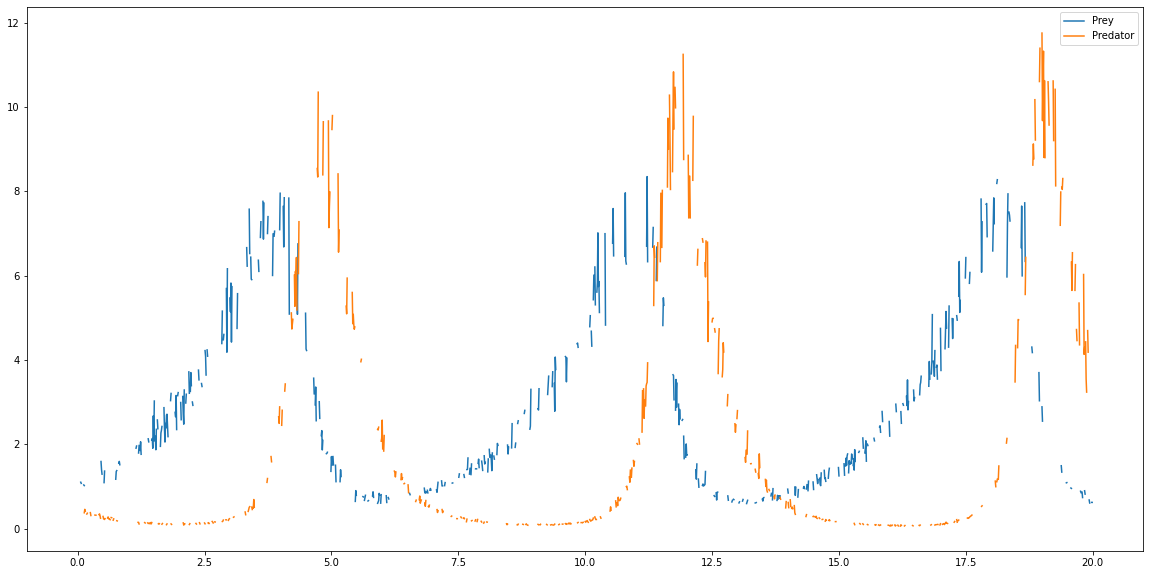

In [5]:
plt.figure(figsize=(20,10))
plt.plot(df['t'],df['x'], label="Prey")
plt.plot(df['t'],df['y'], label="Predator")
plt.legend();

In [6]:
df.dropna(inplace=True,thresh=3)
df

,t,x,y
4,0.04,1.005483,0.477527
6,0.06,1.101832,0.460175
13,0.13,1.020803,0.376706
18,0.18,1.165619,0.345918
30,0.30,1.161122,0.397953
...,...,...,...
1968,19.68,0.973341,4.724112
1974,19.74,0.726388,4.360858
1980,19.80,0.737377,3.822630
1984,19.84,0.898905,4.297797


In [7]:
df['sin'] = df['t'].apply(lambda x: np.sin(x))

df

,t,x,y,sin
4,0.04,1.005483,0.477527,0.039989
6,0.06,1.101832,0.460175,0.059964
13,0.13,1.020803,0.376706,0.129634
18,0.18,1.165619,0.345918,0.179030
30,0.30,1.161122,0.397953,0.295520
...,...,...,...,...
1968,19.68,0.973341,4.724112,0.738231
1974,19.74,0.726388,4.360858,0.777351
1980,19.80,0.737377,3.822630,0.813674
1984,19.84,0.898905,4.297797,0.836270


In [8]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df.iloc[:int(0.8*(len(df)))][['t','sin']] = scaler.fit_transform(df.iloc[:int(0.8*(len(df)))][['t','sin']])
# df.iloc[int(0.8*(len(df))):][['t','sin']] = scaler.transform(df.iloc[int(0.8*(len(df))):][['t','sin']])


In [9]:
df

,t,x,y,sin
4,0.04,1.005483,0.477527,0.039989
6,0.06,1.101832,0.460175,0.059964
13,0.13,1.020803,0.376706,0.129634
18,0.18,1.165619,0.345918,0.179030
30,0.30,1.161122,0.397953,0.295520
...,...,...,...,...
1968,19.68,0.973341,4.724112,0.738231
1974,19.74,0.726388,4.360858,0.777351
1980,19.80,0.737377,3.822630,0.813674
1984,19.84,0.898905,4.297797,0.836270


In [15]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                              verbose = 0,
                                              save_best_only=True
                                             )
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [32]:
from tensorflow.keras import layers
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(layers.Dense(200, activation = "relu"))
# model.add(layers.Dense(20, activation = "tanh"))
model.add(layers.Dense(2, activation="linear"))

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.losses.mae,tf.keras.losses.mse]
             )

history = model.fit(df[:int(0.8*len(df))]['t'], 
          df[:int(0.8*len(df))][['x','y']], 
          epochs = 200, 
          validation_data = (df[int(0.8*len(df)):]['t'], df[int(0.8*len(df)):][['x','y']]),
          callbacks = [lr_scheduler],
          batch_size = 32
         )

Epoch 1/200
9/9 [==============================] - 0s 8ms/step - loss: 7.1132 - mean_absolute_error: 1.7910 - mean_squared_error: 7.1132 - val_loss: 11.4715 - val_mean_absolute_error: 2.8441 - val_mean_squared_error: 11.4715 - lr: 1.0000e-04
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 6.9871 - mean_absolute_error: 1.7750 - mean_squared_error: 6.9871 - val_loss: 10.8406 - val_mean_absolute_error: 2.7550 - val_mean_squared_error: 10.8406 - lr: 1.1220e-04
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 6.8699 - mean_absolute_error: 1.7723 - mean_squared_error: 6.8699 - val_loss: 10.2544 - val_mean_absolute_error: 2.6818 - val_mean_squared_error: 10.2544 - lr: 1.2589e-04
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 6.7788 - mean_absolute_error: 1.7840 - mean_squared_error: 6.7788 - val_loss: 9.7502 - val_mean_absolute_error: 2.6139 - val_mean_squared_error: 9.7502 - lr: 1.4125e-04
Epoch 5/200
9/9 [=================

9/9 [==============================] - 0s 2ms/step - loss: 5.0855 - mean_absolute_error: 1.5671 - mean_squared_error: 5.0855 - val_loss: 10.7864 - val_mean_absolute_error: 2.6913 - val_mean_squared_error: 10.7864 - lr: 0.0050
Epoch 36/200
9/9 [==============================] - 0s 2ms/step - loss: 5.0575 - mean_absolute_error: 1.7215 - mean_squared_error: 5.0575 - val_loss: 20.3594 - val_mean_absolute_error: 3.3757 - val_mean_squared_error: 20.3594 - lr: 0.0056
Epoch 37/200
9/9 [==============================] - 0s 2ms/step - loss: 5.3147 - mean_absolute_error: 1.7171 - mean_squared_error: 5.3147 - val_loss: 17.1929 - val_mean_absolute_error: 3.3302 - val_mean_squared_error: 17.1929 - lr: 0.0063
Epoch 38/200
9/9 [==============================] - 0s 2ms/step - loss: 5.0877 - mean_absolute_error: 1.6863 - mean_squared_error: 5.0877 - val_loss: 22.4568 - val_mean_absolute_error: 3.9981 - val_mean_squared_error: 22.4568 - lr: 0.0071
Epoch 39/200
9/9 [==============================] - 0s 2m

9/9 [==============================] - 0s 2ms/step - loss: 4.3450 - mean_absolute_error: 1.4967 - mean_squared_error: 4.3450 - val_loss: 12.5943 - val_mean_absolute_error: 2.7926 - val_mean_squared_error: 12.5943 - lr: 0.2512
Epoch 70/200
9/9 [==============================] - 0s 2ms/step - loss: 5.2549 - mean_absolute_error: 1.7465 - mean_squared_error: 5.2549 - val_loss: 12.5391 - val_mean_absolute_error: 2.7786 - val_mean_squared_error: 12.5391 - lr: 0.2818
Epoch 71/200
9/9 [==============================] - 0s 2ms/step - loss: 5.2825 - mean_absolute_error: 1.7811 - mean_squared_error: 5.2825 - val_loss: 12.1970 - val_mean_absolute_error: 2.7107 - val_mean_squared_error: 12.1970 - lr: 0.3162
Epoch 72/200
9/9 [==============================] - 0s 2ms/step - loss: 5.1646 - mean_absolute_error: 1.6773 - mean_squared_error: 5.1646 - val_loss: 11.9325 - val_mean_absolute_error: 2.6677 - val_mean_squared_error: 11.9325 - lr: 0.3548
Epoch 73/200
9/9 [==============================] - 0s 2m

9/9 [==============================] - 0s 2ms/step - loss: 5.8302 - mean_absolute_error: 1.7966 - mean_squared_error: 5.8302 - val_loss: 12.1147 - val_mean_absolute_error: 2.2809 - val_mean_squared_error: 12.1147 - lr: 12.5893
Epoch 104/200
9/9 [==============================] - 0s 2ms/step - loss: 9.7098 - mean_absolute_error: 2.5239 - mean_squared_error: 9.7098 - val_loss: 23.1843 - val_mean_absolute_error: 3.7023 - val_mean_squared_error: 23.1843 - lr: 14.1254
Epoch 105/200
9/9 [==============================] - 0s 2ms/step - loss: 12.3828 - mean_absolute_error: 2.8677 - mean_squared_error: 12.3828 - val_loss: 21.1895 - val_mean_absolute_error: 3.5148 - val_mean_squared_error: 21.1895 - lr: 15.8489
Epoch 106/200
9/9 [==============================] - 0s 2ms/step - loss: 9.6313 - mean_absolute_error: 2.4284 - mean_squared_error: 9.6313 - val_loss: 20.6347 - val_mean_absolute_error: 3.8325 - val_mean_squared_error: 20.6347 - lr: 17.7828
Epoch 107/200
9/9 [=============================

9/9 [==============================] - 0s 2ms/step - loss: 6719.8892 - mean_absolute_error: 68.6280 - mean_squared_error: 6719.8892 - val_loss: 9566.6338 - val_mean_absolute_error: 90.8500 - val_mean_squared_error: 9566.6338 - lr: 562.3413
Epoch 137/200
9/9 [==============================] - 0s 2ms/step - loss: 3656.0012 - mean_absolute_error: 51.1864 - mean_squared_error: 3656.0012 - val_loss: 3223.2261 - val_mean_absolute_error: 55.8599 - val_mean_squared_error: 3223.2261 - lr: 630.9573
Epoch 138/200
9/9 [==============================] - 0s 2ms/step - loss: 9897.2686 - mean_absolute_error: 79.3757 - mean_squared_error: 9897.2686 - val_loss: 6607.5703 - val_mean_absolute_error: 61.9160 - val_mean_squared_error: 6607.5703 - lr: 707.9458
Epoch 139/200
9/9 [==============================] - 0s 2ms/step - loss: 16042.4883 - mean_absolute_error: 111.5566 - mean_squared_error: 16042.4883 - val_loss: 11962.5254 - val_mean_absolute_error: 109.0740 - val_mean_squared_error: 11962.5254 - lr: 7

9/9 [==============================] - 0s 2ms/step - loss: 7538149.5000 - mean_absolute_error: 2141.0100 - mean_squared_error: 7538149.5000 - val_loss: 2593825.7500 - val_mean_absolute_error: 1600.4767 - val_mean_squared_error: 2593825.7500 - lr: 19952.6230
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 8958194.0000 - mean_absolute_error: 2225.1738 - mean_squared_error: 8958194.0000 - val_loss: 7136232.5000 - val_mean_absolute_error: 2097.6880 - val_mean_squared_error: 7136232.5000 - lr: 22387.2109
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 23936870.0000 - mean_absolute_error: 3643.1946 - mean_squared_error: 23936870.0000 - val_loss: 36806080.0000 - val_mean_absolute_error: 5392.9355 - val_mean_squared_error: 36806080.0000 - lr: 25118.8652
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 21411616.0000 - mean_absolute_error: 3635.6289 - mean_squared_error: 21411616.0000 - val_loss: 17506204.0000 - val_mean_a

9/9 [==============================] - 0s 2ms/step - loss: 2010280960.0000 - mean_absolute_error: 40222.5039 - mean_squared_error: 2010280960.0000 - val_loss: 624128448.0000 - val_mean_absolute_error: 18927.9980 - val_mean_squared_error: 624128448.0000 - lr: 562341.3125
Epoch 197/200
9/9 [==============================] - 0s 2ms/step - loss: 11706256384.0000 - mean_absolute_error: 91943.3203 - mean_squared_error: 11706256384.0000 - val_loss: 8146080768.0000 - val_mean_absolute_error: 65490.9336 - val_mean_squared_error: 8146080768.0000 - lr: 630957.3750
Epoch 198/200
9/9 [==============================] - 0s 2ms/step - loss: 12638711808.0000 - mean_absolute_error: 96348.6016 - mean_squared_error: 12638711808.0000 - val_loss: 2184481024.0000 - val_mean_absolute_error: 46242.1953 - val_mean_squared_error: 2184481024.0000 - lr: 707945.8125
Epoch 199/200
9/9 [==============================] - 0s 2ms/step - loss: 10293831680.0000 - mean_absolute_error: 90742.0000 - mean_squared_error: 10293

In [33]:
perf = pd.DataFrame(history.history)
perf.loc[perf["val_loss"]==min(perf["val_loss"])]

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,lr
8,6.626884,1.849201,6.626884,8.699881,2.456364,8.699881,0.000251


In [34]:
from tensorflow.keras import layers
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(layers.Dense(200, activation = "relu"))
# model.add(layers.Dense(20, activation = "tanh"))
model.add(layers.Dense(2, activation="linear"))

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.000251),
              metrics=[tf.keras.losses.mae,tf.keras.losses.mse]
             )

history = model.fit(df[:int(0.8*len(df))]['t'], 
          df[:int(0.8*len(df))][['x','y']], 
          epochs = 500, 
          validation_data = (df[int(0.8*len(df)):]['t'], df[int(0.8*len(df)):][['x','y']]),
          callbacks = [create_model_checkpoint("model_1")],
          batch_size = 32
         )

Epoch 1/500
9/9 [==============================] - 0s 32ms/step - loss: 7.0326 - mean_absolute_error: 1.7839 - mean_squared_error: 7.0326 - val_loss: 10.6133 - val_mean_absolute_error: 2.7263 - val_mean_squared_error: 10.6133
Epoch 2/500
9/9 [==============================] - 0s 38ms/step - loss: 6.8036 - mean_absolute_error: 1.7700 - mean_squared_error: 6.8036 - val_loss: 9.6358 - val_mean_absolute_error: 2.5756 - val_mean_squared_error: 9.6358
Epoch 3/500
9/9 [==============================] - 0s 26ms/step - loss: 6.6849 - mean_absolute_error: 1.7957 - mean_squared_error: 6.6849 - val_loss: 9.0602 - val_mean_absolute_error: 2.5041 - val_mean_squared_error: 9.0602
Epoch 4/500
9/9 [==============================] - 0s 26ms/step - loss: 6.6507 - mean_absolute_error: 1.8353 - mean_squared_error: 6.6507 - val_loss: 8.7954 - val_mean_absolute_error: 2.4710 - val_mean_squared_error: 8.7954
Epoch 5/500
9/9 [==============================] - 0s 26ms/step - loss: 6.6362 - mean_absolute_error: 

9/9 [==============================] - 0s 2ms/step - loss: 6.2932 - mean_absolute_error: 1.7811 - mean_squared_error: 6.2932 - val_loss: 9.1409 - val_mean_absolute_error: 2.5123 - val_mean_squared_error: 9.1409
Epoch 33/500
9/9 [==============================] - 0s 2ms/step - loss: 6.2882 - mean_absolute_error: 1.8029 - mean_squared_error: 6.2882 - val_loss: 9.0663 - val_mean_absolute_error: 2.5233 - val_mean_squared_error: 9.0663
Epoch 34/500
9/9 [==============================] - 0s 2ms/step - loss: 6.2847 - mean_absolute_error: 1.8195 - mean_squared_error: 6.2847 - val_loss: 9.0134 - val_mean_absolute_error: 2.5173 - val_mean_squared_error: 9.0134
Epoch 35/500
9/9 [==============================] - 0s 2ms/step - loss: 6.2711 - mean_absolute_error: 1.8005 - mean_squared_error: 6.2711 - val_loss: 9.2045 - val_mean_absolute_error: 2.5116 - val_mean_squared_error: 9.2045
Epoch 36/500
9/9 [==============================] - 0s 2ms/step - loss: 6.2382 - mean_absolute_error: 1.7778 - mean_s

Epoch 69/500
9/9 [==============================] - 0s 2ms/step - loss: 5.8001 - mean_absolute_error: 1.6806 - mean_squared_error: 5.8001 - val_loss: 10.1202 - val_mean_absolute_error: 2.5823 - val_mean_squared_error: 10.1202
Epoch 70/500
9/9 [==============================] - 0s 2ms/step - loss: 5.7887 - mean_absolute_error: 1.6808 - mean_squared_error: 5.7887 - val_loss: 10.0565 - val_mean_absolute_error: 2.5701 - val_mean_squared_error: 10.0565
Epoch 71/500
9/9 [==============================] - 0s 2ms/step - loss: 5.7772 - mean_absolute_error: 1.6901 - mean_squared_error: 5.7772 - val_loss: 9.8451 - val_mean_absolute_error: 2.5446 - val_mean_squared_error: 9.8451
Epoch 72/500
9/9 [==============================] - 0s 2ms/step - loss: 5.7579 - mean_absolute_error: 1.6941 - mean_squared_error: 5.7579 - val_loss: 9.8878 - val_mean_absolute_error: 2.5467 - val_mean_squared_error: 9.8878
Epoch 73/500
9/9 [==============================] - 0s 2ms/step - loss: 5.7446 - mean_absolute_error

9/9 [==============================] - 0s 2ms/step - loss: 5.3729 - mean_absolute_error: 1.6329 - mean_squared_error: 5.3729 - val_loss: 10.7986 - val_mean_absolute_error: 2.6191 - val_mean_squared_error: 10.7986
Epoch 106/500
9/9 [==============================] - 0s 2ms/step - loss: 5.3634 - mean_absolute_error: 1.6320 - mean_squared_error: 5.3634 - val_loss: 10.8263 - val_mean_absolute_error: 2.6277 - val_mean_squared_error: 10.8263
Epoch 107/500
9/9 [==============================] - 0s 2ms/step - loss: 5.3540 - mean_absolute_error: 1.6275 - mean_squared_error: 5.3540 - val_loss: 11.0787 - val_mean_absolute_error: 2.6690 - val_mean_squared_error: 11.0787
Epoch 108/500
9/9 [==============================] - 0s 2ms/step - loss: 5.3420 - mean_absolute_error: 1.6283 - mean_squared_error: 5.3420 - val_loss: 11.0821 - val_mean_absolute_error: 2.6876 - val_mean_squared_error: 11.0821
Epoch 109/500
9/9 [==============================] - 0s 2ms/step - loss: 5.3262 - mean_absolute_error: 1.6

9/9 [==============================] - 0s 2ms/step - loss: 5.1050 - mean_absolute_error: 1.6322 - mean_squared_error: 5.1050 - val_loss: 12.0693 - val_mean_absolute_error: 2.7778 - val_mean_squared_error: 12.0693
Epoch 142/500
9/9 [==============================] - 0s 2ms/step - loss: 5.0969 - mean_absolute_error: 1.6153 - mean_squared_error: 5.0969 - val_loss: 12.4270 - val_mean_absolute_error: 2.8127 - val_mean_squared_error: 12.4270
Epoch 143/500
9/9 [==============================] - 0s 2ms/step - loss: 5.0914 - mean_absolute_error: 1.6091 - mean_squared_error: 5.0914 - val_loss: 12.1458 - val_mean_absolute_error: 2.7648 - val_mean_squared_error: 12.1458
Epoch 144/500
9/9 [==============================] - 0s 2ms/step - loss: 5.0906 - mean_absolute_error: 1.6076 - mean_squared_error: 5.0906 - val_loss: 12.2377 - val_mean_absolute_error: 2.7796 - val_mean_squared_error: 12.2377
Epoch 145/500
9/9 [==============================] - 0s 2ms/step - loss: 5.0828 - mean_absolute_error: 1.6

9/9 [==============================] - 0s 2ms/step - loss: 4.9803 - mean_absolute_error: 1.6398 - mean_squared_error: 4.9803 - val_loss: 13.2563 - val_mean_absolute_error: 2.9250 - val_mean_squared_error: 13.2563
Epoch 178/500
9/9 [==============================] - 0s 2ms/step - loss: 4.9665 - mean_absolute_error: 1.6426 - mean_squared_error: 4.9665 - val_loss: 12.6905 - val_mean_absolute_error: 2.8571 - val_mean_squared_error: 12.6905
Epoch 179/500
9/9 [==============================] - 0s 2ms/step - loss: 4.9718 - mean_absolute_error: 1.6561 - mean_squared_error: 4.9718 - val_loss: 12.8837 - val_mean_absolute_error: 2.8851 - val_mean_squared_error: 12.8837
Epoch 180/500
9/9 [==============================] - 0s 2ms/step - loss: 4.9608 - mean_absolute_error: 1.6412 - mean_squared_error: 4.9608 - val_loss: 13.3081 - val_mean_absolute_error: 2.9170 - val_mean_squared_error: 13.3081
Epoch 181/500
9/9 [==============================] - 0s 2ms/step - loss: 4.9667 - mean_absolute_error: 1.6

9/9 [==============================] - 0s 2ms/step - loss: 4.9226 - mean_absolute_error: 1.6553 - mean_squared_error: 4.9226 - val_loss: 14.1750 - val_mean_absolute_error: 3.0272 - val_mean_squared_error: 14.1750
Epoch 214/500
9/9 [==============================] - 0s 2ms/step - loss: 4.9185 - mean_absolute_error: 1.6584 - mean_squared_error: 4.9185 - val_loss: 13.9316 - val_mean_absolute_error: 2.9892 - val_mean_squared_error: 13.9316
Epoch 215/500
9/9 [==============================] - 0s 2ms/step - loss: 4.9078 - mean_absolute_error: 1.6503 - mean_squared_error: 4.9078 - val_loss: 13.9326 - val_mean_absolute_error: 2.9607 - val_mean_squared_error: 13.9326
Epoch 216/500
9/9 [==============================] - 0s 2ms/step - loss: 4.9059 - mean_absolute_error: 1.6409 - mean_squared_error: 4.9059 - val_loss: 13.9248 - val_mean_absolute_error: 2.9300 - val_mean_squared_error: 13.9248
Epoch 217/500
9/9 [==============================] - 0s 2ms/step - loss: 4.9161 - mean_absolute_error: 1.6

9/9 [==============================] - 0s 2ms/step - loss: 4.8846 - mean_absolute_error: 1.6455 - mean_squared_error: 4.8846 - val_loss: 14.4081 - val_mean_absolute_error: 2.9998 - val_mean_squared_error: 14.4081
Epoch 250/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8819 - mean_absolute_error: 1.6402 - mean_squared_error: 4.8819 - val_loss: 14.5322 - val_mean_absolute_error: 3.0012 - val_mean_squared_error: 14.5322
Epoch 251/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8816 - mean_absolute_error: 1.6315 - mean_squared_error: 4.8816 - val_loss: 14.7245 - val_mean_absolute_error: 3.0088 - val_mean_squared_error: 14.7245
Epoch 252/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8912 - mean_absolute_error: 1.6213 - mean_squared_error: 4.8912 - val_loss: 14.8988 - val_mean_absolute_error: 3.0196 - val_mean_squared_error: 14.8988
Epoch 253/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8909 - mean_absolute_error: 1.6

9/9 [==============================] - 0s 2ms/step - loss: 4.8681 - mean_absolute_error: 1.6467 - mean_squared_error: 4.8681 - val_loss: 14.7733 - val_mean_absolute_error: 3.0551 - val_mean_squared_error: 14.7733
Epoch 286/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8724 - mean_absolute_error: 1.6629 - mean_squared_error: 4.8724 - val_loss: 13.9937 - val_mean_absolute_error: 2.9669 - val_mean_squared_error: 13.9937
Epoch 287/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8671 - mean_absolute_error: 1.6694 - mean_squared_error: 4.8671 - val_loss: 13.8042 - val_mean_absolute_error: 2.9363 - val_mean_squared_error: 13.8042
Epoch 288/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8732 - mean_absolute_error: 1.6743 - mean_squared_error: 4.8732 - val_loss: 13.9034 - val_mean_absolute_error: 2.9488 - val_mean_squared_error: 13.9034
Epoch 289/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8726 - mean_absolute_error: 1.6

9/9 [==============================] - 0s 2ms/step - loss: 4.8484 - mean_absolute_error: 1.6524 - mean_squared_error: 4.8484 - val_loss: 14.5714 - val_mean_absolute_error: 3.0232 - val_mean_squared_error: 14.5714
Epoch 322/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8516 - mean_absolute_error: 1.6629 - mean_squared_error: 4.8516 - val_loss: 14.6002 - val_mean_absolute_error: 3.0331 - val_mean_squared_error: 14.6002
Epoch 323/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8473 - mean_absolute_error: 1.6532 - mean_squared_error: 4.8473 - val_loss: 15.3328 - val_mean_absolute_error: 3.1042 - val_mean_squared_error: 15.3328
Epoch 324/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8599 - mean_absolute_error: 1.6316 - mean_squared_error: 4.8599 - val_loss: 15.7838 - val_mean_absolute_error: 3.1256 - val_mean_squared_error: 15.7838
Epoch 325/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8594 - mean_absolute_error: 1.6

9/9 [==============================] - 0s 2ms/step - loss: 4.8529 - mean_absolute_error: 1.6314 - mean_squared_error: 4.8529 - val_loss: 15.6634 - val_mean_absolute_error: 3.0927 - val_mean_squared_error: 15.6634
Epoch 358/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8408 - mean_absolute_error: 1.6184 - mean_squared_error: 4.8408 - val_loss: 15.4120 - val_mean_absolute_error: 3.0614 - val_mean_squared_error: 15.4120
Epoch 359/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8375 - mean_absolute_error: 1.6284 - mean_squared_error: 4.8375 - val_loss: 14.6296 - val_mean_absolute_error: 2.9710 - val_mean_squared_error: 14.6296
Epoch 360/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8457 - mean_absolute_error: 1.6476 - mean_squared_error: 4.8457 - val_loss: 14.2297 - val_mean_absolute_error: 2.9429 - val_mean_squared_error: 14.2297
Epoch 361/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8373 - mean_absolute_error: 1.6

9/9 [==============================] - 0s 2ms/step - loss: 4.8335 - mean_absolute_error: 1.6805 - mean_squared_error: 4.8335 - val_loss: 14.7030 - val_mean_absolute_error: 3.0311 - val_mean_squared_error: 14.7030
Epoch 394/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8195 - mean_absolute_error: 1.6438 - mean_squared_error: 4.8195 - val_loss: 15.5998 - val_mean_absolute_error: 3.0936 - val_mean_squared_error: 15.5998
Epoch 395/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8330 - mean_absolute_error: 1.6222 - mean_squared_error: 4.8330 - val_loss: 15.7804 - val_mean_absolute_error: 3.0946 - val_mean_squared_error: 15.7804
Epoch 396/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8274 - mean_absolute_error: 1.6357 - mean_squared_error: 4.8274 - val_loss: 14.7593 - val_mean_absolute_error: 3.0092 - val_mean_squared_error: 14.7593
Epoch 397/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8282 - mean_absolute_error: 1.6

9/9 [==============================] - 0s 2ms/step - loss: 4.8116 - mean_absolute_error: 1.6237 - mean_squared_error: 4.8116 - val_loss: 15.3638 - val_mean_absolute_error: 3.0216 - val_mean_squared_error: 15.3638
Epoch 430/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8205 - mean_absolute_error: 1.6181 - mean_squared_error: 4.8205 - val_loss: 15.2920 - val_mean_absolute_error: 3.0002 - val_mean_squared_error: 15.2920
Epoch 431/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8209 - mean_absolute_error: 1.6275 - mean_squared_error: 4.8209 - val_loss: 15.1825 - val_mean_absolute_error: 3.0289 - val_mean_squared_error: 15.1825
Epoch 432/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8121 - mean_absolute_error: 1.6304 - mean_squared_error: 4.8121 - val_loss: 15.2054 - val_mean_absolute_error: 3.0133 - val_mean_squared_error: 15.2054
Epoch 433/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8116 - mean_absolute_error: 1.6

9/9 [==============================] - 0s 2ms/step - loss: 4.7996 - mean_absolute_error: 1.6385 - mean_squared_error: 4.7996 - val_loss: 15.1224 - val_mean_absolute_error: 3.0450 - val_mean_squared_error: 15.1224
Epoch 466/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8020 - mean_absolute_error: 1.6431 - mean_squared_error: 4.8020 - val_loss: 15.4028 - val_mean_absolute_error: 3.0619 - val_mean_squared_error: 15.4028
Epoch 467/500
9/9 [==============================] - 0s 2ms/step - loss: 4.7995 - mean_absolute_error: 1.6276 - mean_squared_error: 4.7995 - val_loss: 15.7535 - val_mean_absolute_error: 3.0865 - val_mean_squared_error: 15.7535
Epoch 468/500
9/9 [==============================] - 0s 2ms/step - loss: 4.8006 - mean_absolute_error: 1.6209 - mean_squared_error: 4.8006 - val_loss: 15.5526 - val_mean_absolute_error: 3.0542 - val_mean_squared_error: 15.5526
Epoch 469/500
9/9 [==============================] - 0s 2ms/step - loss: 4.7982 - mean_absolute_error: 1.6

In [35]:
loss = pd.DataFrame(history.history)
loss.loc[loss['val_loss']==min(loss['val_loss'])]

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
8,6.587453,1.846404,6.587453,8.733603,2.461828,8.733603


In [37]:
# train_pred = model.predict(train)
# test_pred = model.predict(test)

test_pred = model.predict(df[int(0.8*len(df)):]['t'])

In [38]:
test_pred

array([[1.4697051 , 1.343636  ],
       [1.4630471 , 1.3413208 ],
       [1.4580542 , 1.3395834 ],
       [1.4530607 , 1.3378466 ],
       [1.4414098 , 1.3337938 ],
       [1.428095  , 1.3291618 ],
       [1.4097867 , 1.322792  ],
       [1.408122  , 1.3222133 ],
       [1.3764977 , 1.3112122 ],
       [1.3715048 , 1.3094753 ],
       [1.3648475 , 1.307159  ],
       [1.3598548 , 1.3054221 ],
       [1.3515316 , 1.3025272 ],
       [1.341546  , 1.2990528 ],
       [1.334888  , 1.296737  ],
       [1.3249015 , 1.2932628 ],
       [1.3232374 , 1.2926826 ],
       [1.3215731 , 1.2921042 ],
       [1.3032645 , 1.2857363 ],
       [1.2966068 , 1.2834193 ],
       [1.288285  , 1.2805258 ],
       [1.2866204 , 1.2799457 ],
       [1.2816273 , 1.2782089 ],
       [1.2766342 , 1.2764717 ],
       [1.2666478 , 1.2729975 ],
       [1.2599897 , 1.2706811 ],
       [1.2500039 , 1.2672077 ],
       [1.2466747 , 1.2660499 ],
       [1.2450104 , 1.2654703 ],
       [1.2416816 , 1.2643129 ],
       [1.

In [39]:
# y_test
df[int(0.8*len(df)):][['x','y']]

,x,y
1623,2.499288,0.077739
1627,2.927579,0.072955
1630,2.499691,0.074334
1633,3.139104,0.081673
1640,3.448722,0.069987
...,...,...
1968,0.973341,4.724112
1974,0.726388,4.360858
1980,0.737377,3.822630
1984,0.898905,4.297797


In [23]:
model.evaluate(test_pred, df[int(0.8*len(df)):][['x','y']])

3/3 [==============================] - 0s 1000us/step - loss: 26.4960 - mean_absolute_error: 4.3500 - mean_squared_error: 26.4960


[26.49595069885254, 4.350043296813965, 26.49595069885254]

In [24]:
model = tf.keras.models.load_model("model_experiments/model_1/")
# model.evaluate(test, y_test)

In [25]:
test_pred = model.predict(df[int(0.8*len(df)):][['x','y']])